# Neural Network for regression problems - Keras 

In [93]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [94]:
# use IBM can directly read data from api to df
# concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
# concrete_data.head()

import io 
import requests
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
src = requests.get(url).content
df = pd.read_csv(io.StringIO(src.decode('utf-8')))
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [95]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [96]:
# shape of data
df.shape

(1030, 9)

In [97]:
# check descriptive stats
round(df.describe(),2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


In [98]:
# check missing values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

- There are no missing values acorss the dataset

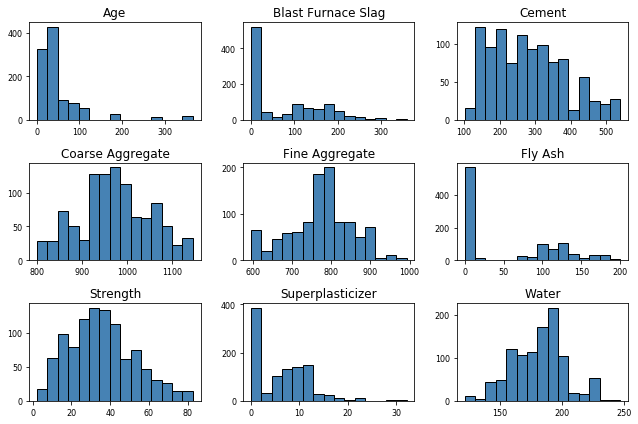

In [99]:
# check the distribution of each attributes

df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


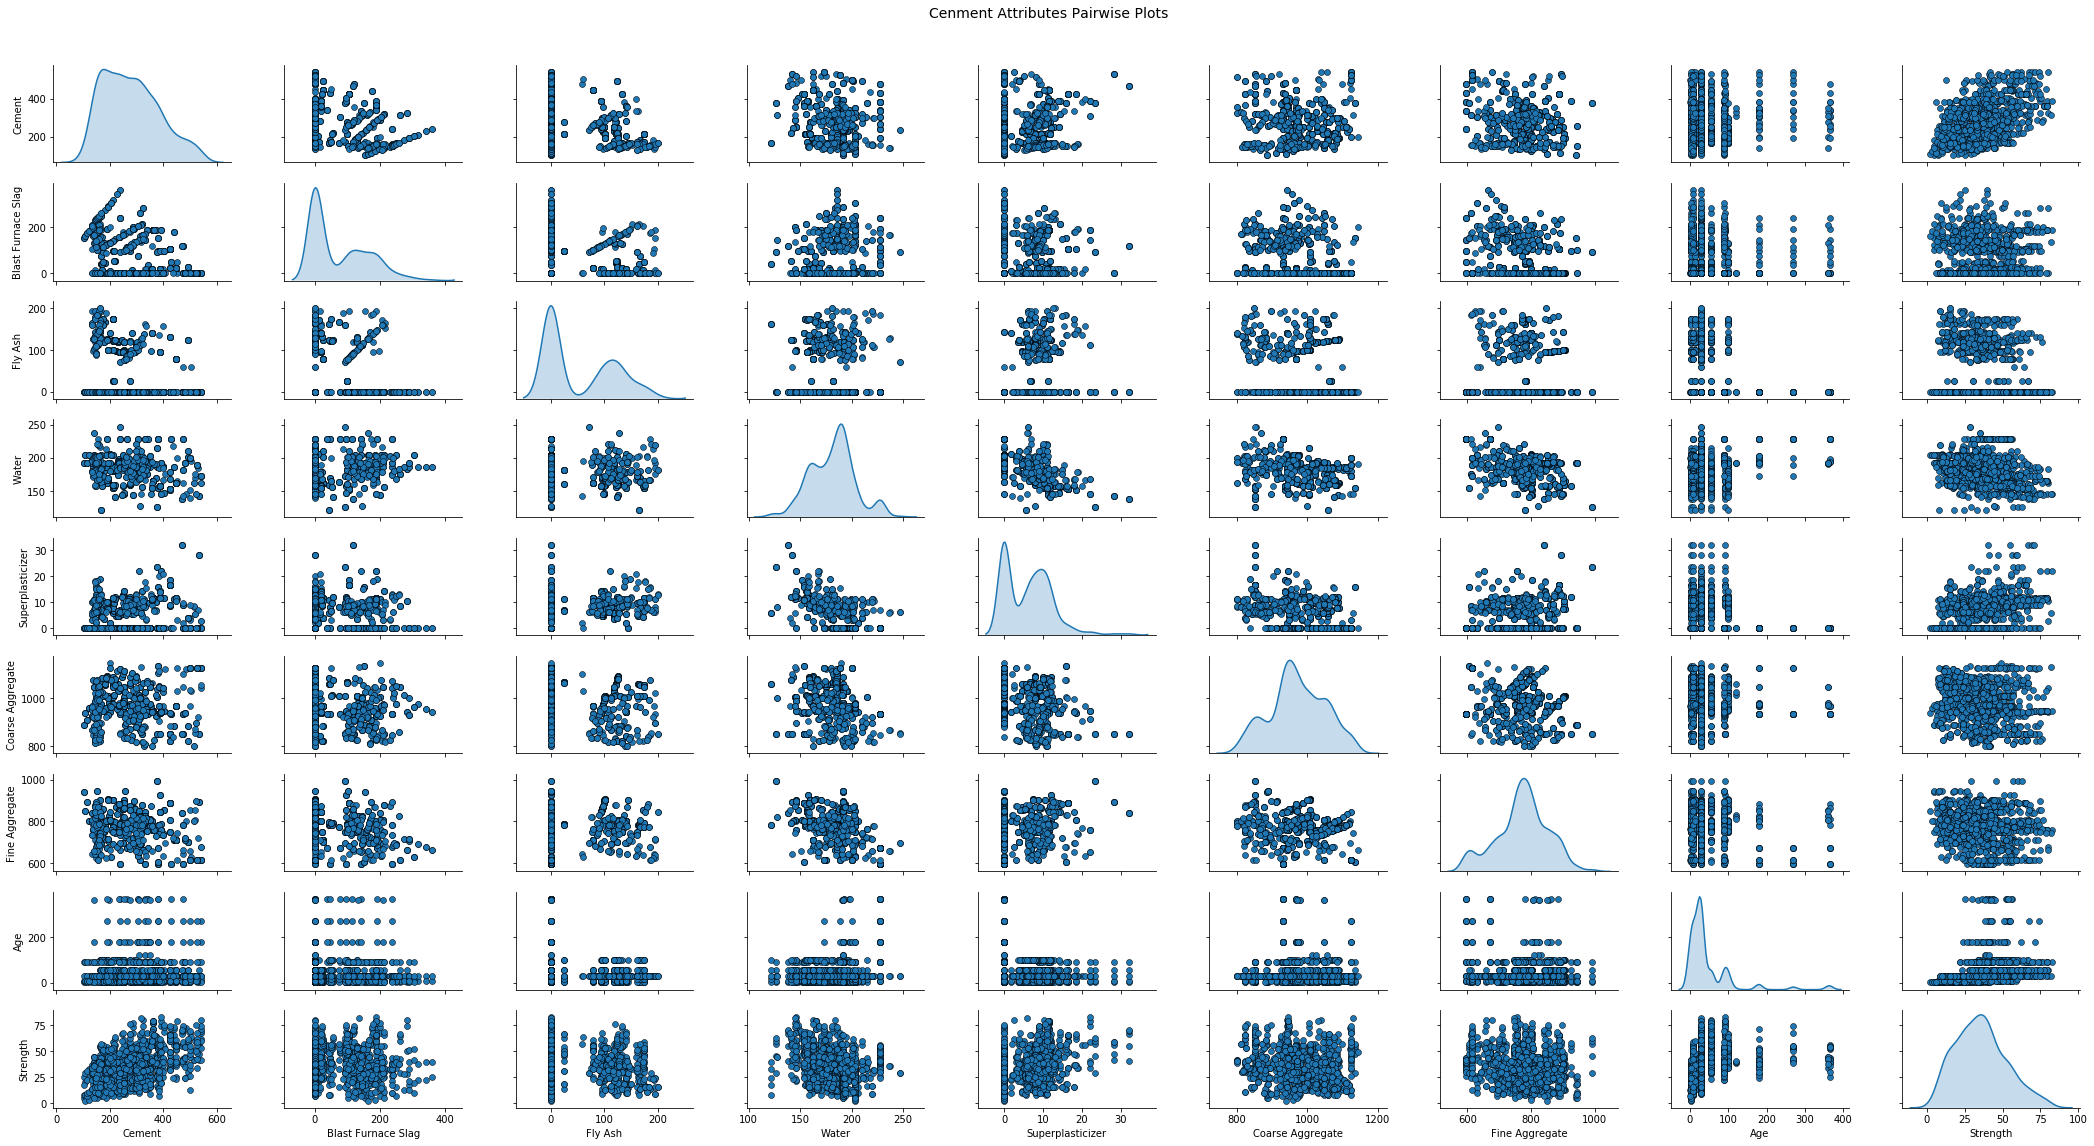

In [100]:
# pair-wise scatter plot

cols = df.columns
pp = sns.pairplot(df[cols], 
                  size=1.8, 
                  aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Cenment Attributes Pairwise Plots', fontsize=14)

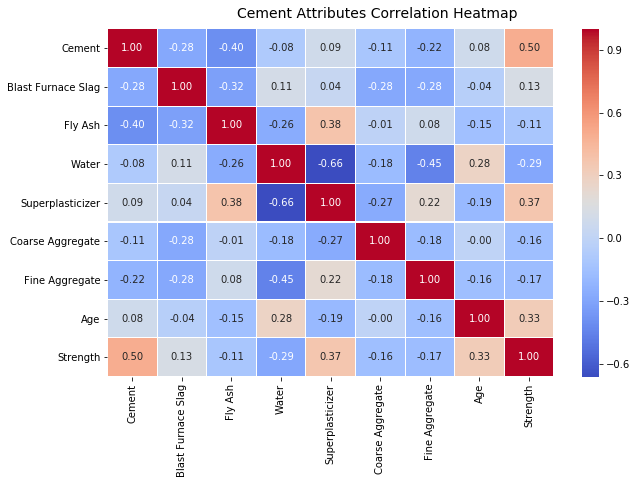

In [101]:
# correlaion matrix heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Cement Attributes Correlation Heatmap', fontsize=14)

## Split data into Predictors and Target


- Predictors/ features: 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate'
- Target: 'Strength' 
    
- build a regresison model to predict the 'Strength' of the cement

In [102]:
df.drop(['Age'], axis = 1, inplace = True)
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89


In [103]:
# identify X and y
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate']]
y = df['Strength']

# Part A: build a baseline model

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [110]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [111]:
# number of predictors
n_cols = X_train.shape[1]
n_cols

7

In [112]:
# define the regression model
def regression_model():
    # create model with one hidden layer of 10 nodes
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [113]:
model = regression_model()
model.fit(X_train, y_train, epochs = 50, verbose = 1)
y_pred = model.predict(X_test)

Epoch 1/50
721/721 [==============================] - 1s 2ms/step - loss: 15449.5740
Epoch 2/50
721/721 [==============================] - 0s 190us/step - loss: 5514.8123
Epoch 3/50
721/721 [==============================] - 0s 184us/step - loss: 4201.3672
Epoch 4/50
721/721 [==============================] - 0s 172us/step - loss: 3669.5196
Epoch 5/50
721/721 [==============================] - 0s 180us/step - loss: 3222.3210
Epoch 6/50
721/721 [==============================] - 0s 216us/step - loss: 2846.3037
Epoch 7/50
721/721 [==============================] - 0s 193us/step - loss: 2537.7533
Epoch 8/50
721/721 [==============================] - 0s 196us/step - loss: 2263.1767
Epoch 9/50
721/721 [==============================] - 0s 206us/step - loss: 2034.5729
Epoch 10/50
721/721 [==============================] - 0s 262us/step - loss: 1828.2041
Epoch 11/50
721/721 [==============================] - 0s 212us/step - loss: 1643.2351
Epoch 12/50
721/721 [==============================] 

In [108]:
# evaluate the model
loss_scores = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_scores

309/309 [==============================] - 0s 888us/step


213.0556842594085

In [114]:
print('Mean Squared Error:', loss_scores)       

Mean Squared Error: 213.0556842594085


In [115]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mean_mse = np.mean(mse)
std_mse = np.std(mse)
print(mean_mse, std_mse)

205.76371598651298 0.0


In [116]:
# repeat these steps for 50 times

total_mse = 50
epochs = 50
mses = []
for i in range(0, total_mse):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

mses = np.array(mses)
mean_mse = np.mean(mses)
std_mse = np.std(mses)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mse) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_mse))
print("Standard Deviation: "+str(std_mse))

MSE 1: 150.3752993241097
MSE 2: 165.31563842180864
MSE 3: 168.22909995267307
MSE 4: 182.3236591869959
MSE 5: 174.4725799560547
MSE 6: 158.17492954784998
MSE 7: 190.4244042060136
MSE 8: 152.6810137307374
MSE 9: 170.45432856785055
MSE 10: 165.4459087285409
MSE 11: 156.23823132561247
MSE 12: 145.0811635236524
MSE 13: 161.08334740697373
MSE 14: 166.21564145381396
MSE 15: 152.79006338273823
MSE 16: 137.44576520209944
MSE 17: 156.43144342120024
MSE 18: 133.19881782408285
MSE 19: 144.22989548371447
MSE 20: 175.6280069690692
MSE 21: 141.59464814516332
MSE 22: 160.8077569362801
MSE 23: 159.32888048289277
MSE 24: 153.88972552154442
MSE 25: 144.50475575468687
MSE 26: 151.3604375845406
MSE 27: 170.3905408544448
MSE 28: 155.75430559571893
MSE 29: 158.64602103125316
MSE 30: 150.49992563192126
MSE 31: 153.21345036083827
MSE 32: 151.35837747518298
MSE 33: 149.33145926762552
MSE 34: 153.70614293169436
MSE 35: 157.26743862312588
MSE 36: 171.13878742699484
MSE 37: 163.03044925924257
MSE 38: 162.628543989

# Part B

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [117]:
# normalize data
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569


In [118]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.3, random_state=4)

# number of predictors
n_cols = X_train.shape[1]
n_cols

7

In [119]:
# define the regression model
def regression_model():
    # create model with one hidden layer of 10 nodes
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# fit the model
model = regression_model()
model.fit(X_train, y_train, epochs = 50, verbose = 1)
y_pred = model.predict(X_test)

# evaluate the model
loss_scores = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_scores

Epoch 1/50
721/721 [==============================] - 3s 4ms/step - loss: 1599.5970
Epoch 2/50
721/721 [==============================] - 0s 221us/step - loss: 1583.5872
Epoch 3/50
721/721 [==============================] - 0s 220us/step - loss: 1568.0307
Epoch 4/50
721/721 [==============================] - 0s 182us/step - loss: 1552.7692
Epoch 5/50
721/721 [==============================] - 1s 1ms/step - loss: 1537.5679
Epoch 6/50
721/721 [==============================] - 0s 242us/step - loss: 1522.4806
Epoch 7/50
721/721 [==============================] - 0s 272us/step - loss: 1507.4217
Epoch 8/50
721/721 [==============================] - 0s 444us/step - loss: 1491.9388
Epoch 9/50
721/721 [==============================] - 0s 194us/step - loss: 1476.4328
Epoch 10/50
721/721 [==============================] - 0s 270us/step - loss: 1460.4062
Epoch 11/50
721/721 [==============================] - 0s 198us/step - loss: 1443.9556
Epoch 12/50
721/721 [==============================] - 0

529.4551793564485

In [120]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mean_mse = np.mean(mse)
std_mse = np.std(mse)
print(mean_mse, std_mse)

529.455170902568 0.0


In [121]:
# repeat these steps for 50 times

total_mse = 50
epochs = 50
mses = []
for i in range(0, total_mse):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

mses = np.array(mses)
mean_mse = np.mean(mses)
std_mse = np.std(mses)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mse) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_mse))
print("Standard Deviation: "+str(std_mse))

MSE 1: 19193.16659397755
MSE 2: 3821.6302936640373
MSE 3: 406.3251085991227
MSE 4: 310.4492724767395
MSE 5: 255.93925490888577
MSE 6: 179.02413723152432
MSE 7: 186.2601018615525
MSE 8: 159.53078236008926
MSE 9: 183.446018502936
MSE 10: 170.42413581922216
MSE 11: 153.87447255946284
MSE 12: 146.22378520286586
MSE 13: 150.97916691357264
MSE 14: 191.6720586980431
MSE 15: 158.79720308865544
MSE 16: 142.353329408516
MSE 17: 148.93228233362092
MSE 18: 135.85167010162255
MSE 19: 153.9893536613983
MSE 20: 171.04870570901915
MSE 21: 142.6284064629317
MSE 22: 155.89231615776384
MSE 23: 153.8136759637629
MSE 24: 156.2847777431451
MSE 25: 142.51398663073297
MSE 26: 144.67217820053347
MSE 27: 170.23027147212846
MSE 28: 154.852128013438
MSE 29: 168.71952405022185
MSE 30: 161.41793813365948
MSE 31: 150.3648610531705
MSE 32: 160.92606716711543
MSE 33: 156.76164541892635
MSE 34: 151.73623454763666
MSE 35: 156.32194306703832
MSE 36: 172.94944689111801
MSE 37: 194.92079937882409
MSE 38: 162.2998978204326


**Conclusion:**
- the mean of the mean squared errors increased from Step A (mean = 157.59, std = 11.19) to Step B (mean = 626.24, std = 2701.50)

# Part C

- Increate the number of epochs 

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [122]:
# normalize data
X_norm = (X - X.mean()) / X.std()
# X_norm.head()

# split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.3, random_state=4)

# number of predictors
n_cols = X_train.shape[1]
# n_cols

# define the regression model
def regression_model():
    # create model with one hidden layer of 10 nodes
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# fit the model
model = regression_model()
model.fit(X_train, y_train, epochs = 50, verbose = 1)
y_pred = model.predict(X_test)

# evaluate the model
loss_scores = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_scores

Epoch 1/50
721/721 [==============================] - 1s 2ms/step - loss: 1675.9174
Epoch 2/50
721/721 [==============================] - 0s 157us/step - loss: 1657.7748
Epoch 3/50
721/721 [==============================] - 0s 218us/step - loss: 1640.6494
Epoch 4/50
721/721 [==============================] - 0s 165us/step - loss: 1624.5400
Epoch 5/50
721/721 [==============================] - 0s 188us/step - loss: 1609.2796
Epoch 6/50
721/721 [==============================] - 0s 183us/step - loss: 1594.7500
Epoch 7/50
721/721 [==============================] - 0s 213us/step - loss: 1580.9217
Epoch 8/50
721/721 [==============================] - 0s 294us/step - loss: 1567.3722
Epoch 9/50
721/721 [==============================] - 0s 218us/step - loss: 1554.2775
Epoch 10/50
721/721 [==============================] - 0s 173us/step - loss: 1541.5267
Epoch 11/50
721/721 [==============================] - 0s 163us/step - loss: 1528.6088
Epoch 12/50
721/721 [==============================] -

715.65743080312

In [123]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mean_mse = np.mean(mse)
std_mse = np.std(mse)

In [124]:
# repeat these steps for 50 times

total_mse = 50
epochs = 100
mses = []
for i in range(0, total_mse):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

mses = np.array(mses)
mean_mse = np.mean(mses)
std_mse = np.std(mses)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mse) + 
      " mean squared errors without normalized data. Total number of epochs for each training is: " 
      + str(epochs) 
      + "\n")
print("Mean: "+str(mean_mse))
print("Standard Deviation: "+ str(std_mse))

MSE 1: 136.37000138859918
MSE 2: 156.912392378625
MSE 3: 153.15357388493314
MSE 4: 170.05681116295477
MSE 5: 171.40017443413103
MSE 6: 142.71743544791508
MSE 7: 180.0439929159714
MSE 8: 140.53818741585445
MSE 9: 153.40611434985905
MSE 10: 154.4660292937146
MSE 11: 144.3646977001795
MSE 12: 133.4140643024136
MSE 13: 134.05067001885968
MSE 14: 161.94393688806824
MSE 15: 140.1042321955116
MSE 16: 122.97810057606127
MSE 17: 139.64173965701008
MSE 18: 116.02911855950711
MSE 19: 132.9704747863572
MSE 20: 155.84084589195868
MSE 21: 132.58229672330097
MSE 22: 153.76908914016676
MSE 23: 143.3268637055332
MSE 24: 138.72108400215222
MSE 25: 122.36715601948859
MSE 26: 145.11598052484703
MSE 27: 154.90867165377225
MSE 28: 146.93076410879982
MSE 29: 158.1132048079111
MSE 30: 139.62182691259292
MSE 31: 136.46495411696944
MSE 32: 138.42739766932613
MSE 33: 144.54830537567634
MSE 34: 137.17682936585066
MSE 35: 144.0345960203498
MSE 36: 154.42558063889786
MSE 37: 146.16798146565756
MSE 38: 147.998066281

**Conclusion:**
- the mean of the mean squared errors desceased from Step B (mean = 626.24, std = 2701.50) to Step C (mean = 144.64, std = 12.17)

# Part D

- Increase the number of hidden layers 

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [127]:
# normalize data
X_norm = (X - X.mean()) / X.std()
# X_norm.head()

# split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.3, random_state=4)

# number of predictors
n_cols = X_train.shape[1]
# n_cols

# define the regression model
def regression_model():
    # create model with one hidden layer of 10 nodes
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# fit the model
model = regression_model()
model.fit(X_train, y_train, epochs = 50, verbose = 1)
y_pred = model.predict(X_test)

# evaluate the model
loss_scores = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_scores

Epoch 1/50
721/721 [==============================] - 2s 3ms/step - loss: 1556.3788
Epoch 2/50
721/721 [==============================] - 0s 509us/step - loss: 1529.2381
Epoch 3/50
721/721 [==============================] - 1s 2ms/step - loss: 1483.0567
Epoch 4/50
721/721 [==============================] - 0s 515us/step - loss: 1406.2255
Epoch 5/50
721/721 [==============================] - 1s 1ms/step - loss: 1274.2488
Epoch 6/50
721/721 [==============================] - 0s 451us/step - loss: 1058.6775
Epoch 7/50
721/721 [==============================] - 0s 474us/step - loss: 789.9280
Epoch 8/50
721/721 [==============================] - 0s 545us/step - loss: 534.0440
Epoch 9/50
721/721 [==============================] - 1s 731us/step - loss: 366.7060
Epoch 10/50
721/721 [==============================] - 1s 1ms/step - loss: 290.9629
Epoch 11/50
721/721 [==============================] - 0s 465us/step - loss: 255.7486
Epoch 12/50
721/721 [==============================] - 0s 445us/s

188.76499104422658

In [129]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mean_mse = np.mean(mse)
std_mse = np.std(mse)
mean_mse,std_mse

(188.76499009025747, 0.0)

In [130]:
# repeat these steps for 50 times
total_mse = 50
epochs = 50
mses = []
for i in range(0, total_mse):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

mses = np.array(mses)
mean_mse = np.mean(mses)
std_mse = np.std(mses)

print('\n')
print("Below is the mean and standard deviation of " + str(total_mse) + 
      " mean squared errors without normalized data. Total number of epochs for each training is: " 
      + str(epochs) 
      + "\n")
print("Mean: "+str(mean_mse))
print("Standard Deviation: "+str(std_mse))

MSE 1: 538.1407500331842
MSE 2: 335.8748406962669
MSE 3: 307.6965376474325
MSE 4: 327.64695181738597
MSE 5: 274.10516189525816
MSE 6: 248.09423225674428
MSE 7: 279.255119842233
MSE 8: 184.6040942738357
MSE 9: 179.49190420008784
MSE 10: 176.01693518184922
MSE 11: 163.55937471358908
MSE 12: 144.3012757038993
MSE 13: 150.43472885082454
MSE 14: 185.1190537140979
MSE 15: 147.29183461210874
MSE 16: 147.98309410119904
MSE 17: 145.86580280192848
MSE 18: 127.02889160353774
MSE 19: 144.2774254264955
MSE 20: 174.67422752010012
MSE 21: 149.58241123829072
MSE 22: 155.73228029911573
MSE 23: 147.74637290189182
MSE 24: 137.41979787882093
MSE 25: 156.76145228907515
MSE 26: 138.995918199854
MSE 27: 152.03820213145036
MSE 28: 146.2529339342827
MSE 29: 141.6347682915845
MSE 30: 129.9209651514936
MSE 31: 138.28072088050226
MSE 32: 148.24322335696914
MSE 33: 130.030443654477
MSE 34: 132.92026144478314
MSE 35: 130.84891221129777
MSE 36: 142.90548622106658
MSE 37: 142.87028483665492
MSE 38: 129.8997891126713


**Conclusion:**
- the mean of the mean squared errors desceased from Step B (mean = 626.24, std = 2701.50) to Step B (mean = 169.45, std = 74.64)